In [1]:
%matplotlib inline
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
l = Lattice3D(dim=(3, 3, 3), pbc=True, with_positions=True, geo='bcc', 
              theta=np.pi/16, phi=np.pi/3)

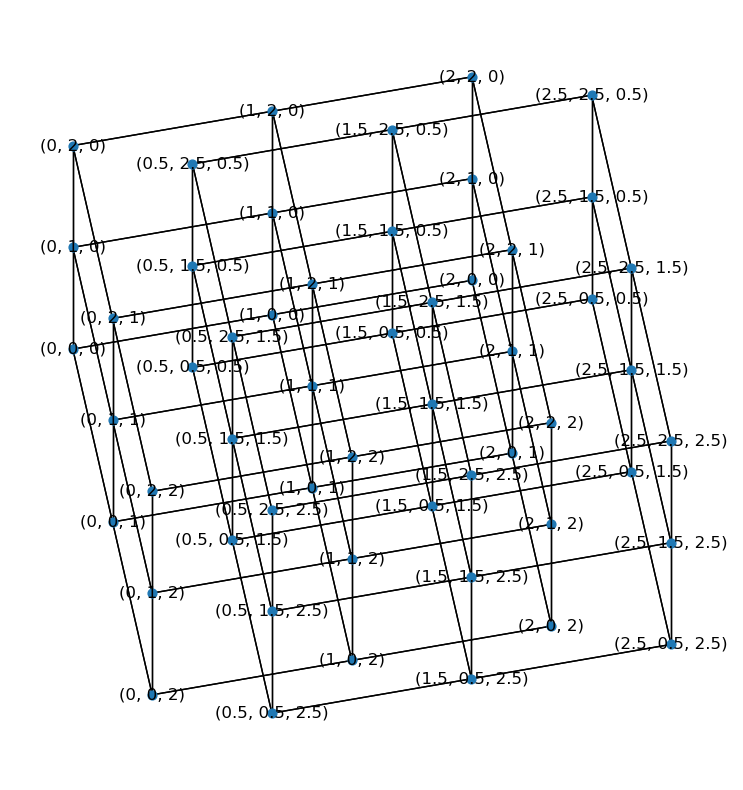

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
nx.draw(l.G, pos=l.get_node_pos(), node_size=40, with_labels=True)

In [4]:
dict(l.G.degree()).values()

dict_values([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [4]:
np.where(l.G.degree()

DegreeView({(0, 0, 0): 6, (0, 0, 1): 6, (0, 0, 2): 6, (0, 1, 0): 6, (0, 1, 1): 6, (0, 1, 2): 6, (0, 2, 0): 6, (0, 2, 1): 6, (0, 2, 2): 6, (1, 0, 0): 6, (1, 0, 1): 6, (1, 0, 2): 6, (1, 1, 0): 6, (1, 1, 1): 6, (1, 1, 2): 6, (1, 2, 0): 6, (1, 2, 1): 6, (1, 2, 2): 6, (2, 0, 0): 6, (2, 0, 1): 6, (2, 0, 2): 6, (2, 1, 0): 6, (2, 1, 1): 6, (2, 1, 2): 6, (2, 2, 0): 6, (2, 2, 1): 6, (2, 2, 2): 6})

In [10]:
list(l.cprod)

[]

In [9]:
for x, y, z in l.cprod: 
    print(x, y, z)

In [7]:
for x, y, z in l.cprod:  # Assuming self.cprod includes all relevant nodes
        for ddx, ddy, ddz in [(1, 0, 0), (0, 1, 0), (0, 0, 1)]:
            print((x + ddx, y + ddy, z + ddz))
            if (x + ddx, y + ddy, z + ddz) in l.G.nodes():
                  pass

In [4]:
list(l.G.neighbors((2.5, 1.5, 2.5)))

[(0.5, 1.5, 2.5)]

In [13]:
l.G.degree()

DegreeView({(0, 0, 0): 6, (0, 0, 1): 6, (0, 0, 2): 6, (0, 1, 0): 6, (0, 1, 1): 6, (0, 1, 2): 6, (0, 2, 0): 5, (0, 2, 1): 6, (0, 2, 2): 5, (1, 0, 0): 6, (1, 0, 1): 6, (1, 0, 2): 6, (1, 1, 0): 6, (1, 1, 1): 6, (1, 1, 2): 6, (1, 2, 0): 5, (1, 2, 1): 6, (1, 2, 2): 5, (2, 0, 0): 5, (2, 0, 1): 6, (2, 0, 2): 5, (2, 1, 0): 5, (2, 1, 1): 6, (2, 1, 2): 5, (2, 2, 0): 5, (2, 2, 1): 6, (2, 2, 2): 5, (0.5, 0.5, 0.5): 6, (0.5, 0.5, 1.5): 6, (0.5, 0.5, 2.5): 6, (0.5, 1.5, 0.5): 6, (0.5, 1.5, 1.5): 6, (0.5, 1.5, 2.5): 6, (0.5, 2.5, 0.5): 5, (0.5, 2.5, 1.5): 6, (0.5, 2.5, 2.5): 5, (1.5, 0.5, 0.5): 6, (1.5, 0.5, 1.5): 6, (1.5, 0.5, 2.5): 6, (1.5, 1.5, 0.5): 6, (1.5, 1.5, 1.5): 6, (1.5, 1.5, 2.5): 6, (1.5, 2.5, 0.5): 5, (1.5, 2.5, 1.5): 6, (1.5, 2.5, 2.5): 5, (2.5, 0.5, 0.5): 5, (2.5, 0.5, 1.5): 6, (2.5, 0.5, 2.5): 5, (2.5, 1.5, 0.5): 5, (2.5, 1.5, 1.5): 6, (2.5, 1.5, 2.5): 5, (2.5, 2.5, 0.5): 5, (2.5, 2.5, 1.5): 6, (2.5, 2.5, 2.5): 5})

In [6]:
l.G.has_edge((0.5, 0.5, 2.5), (2.5, 0.5, 2.5))

True

In [5]:
l.G.number_of_nodes()

54

In [5]:
dim = (2, 2, 4, 2, 2)
import numpy as np
np.prod(dim)
# str("{}_".format(*dim))
sorted(dim, reverse=True)

[4, 2, 2, 2, 2]

In [61]:
('L{}={},'*(len(dim)-1)+'{}').format(*zip(np.arange(len(dim)), dim))

IndexError: Replacement index 5 out of range for positional args tuple

In [69]:
import numpy as np

dim = (10, 20, 30)  # Example list of dimensions

formatted_string = '_'.join('L{}={}'.format(i+1, dim[i]) for i in range(len(dim)))

print(formatted_string)


L1=10_L2=20_L3=30


In [71]:
import numpy as np

def get_neighbor_shifts(lattice_type):
    if lattice_type == 'SC':
        # Simple cubic neighbors
        return [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1)]
    elif lattice_type == 'BCC':
        # Add body-centered neighbors to SC
        return [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1),
                (1,1,1), (-1,-1,-1), (1,-1,1), (-1,1,-1), (1,1,-1), (-1,-1,1),
                (1,-1,-1), (-1,1,1)]
    elif lattice_type == 'FCC':
        # Add face-centered neighbors to SC
        return [(1,0,0), (-1,0,0), (0,1,0), (0,-1,0), (0,0,1), (0,0,-1),
                (1,1,0), (-1,-1,0), (1,0,1), (0,1,1), (-1,0,-1), (0,-1,-1),
                (1,-1,0), (-1,1,0), (0,1,-1), (0,-1,1), (1,0,-1), (-1,0,1)]

def lattice_adjacency_matrix(lattice_type, L):
    N = L**3  # Total number of nodes
    adjacency_matrix = np.zeros((N, N))
    shifts = get_neighbor_shifts(lattice_type)

    for x in range(L):
        for y in range(L):
            for z in range(L):
                i = x * L**2 + y * L + z  # Convert 3D index to 1D
                for dx, dy, dz in shifts:
                    # Apply PBC
                    nx, ny, nz = (x + dx) % L, (y + dy) % L, (z + dz) % L
                    j = nx * L**2 + ny * L + nz  # Neighbor index
                    adjacency_matrix[i, j] = 1
                    
    return adjacency_matrix

# Example usage:
L = 4  # Lattice size
for lattice_type in ['SC', 'BCC', 'FCC']:
    print(f"{lattice_type} adjacency matrix for L={L}:")
    adj_matrix = lattice_adjacency_matrix(lattice_type, L)
    # Uncomment to print the matrix
    # print(adj_matrix)
    print(f"Matrix shape: {adj_matrix.shape}")


SC adjacency matrix for L=4:
Matrix shape: (64, 64)
BCC adjacency matrix for L=4:
Matrix shape: (64, 64)
FCC adjacency matrix for L=4:
Matrix shape: (64, 64)


In [65]:
zip(np.arange(len(dim)), dim).

In [59]:
for i in zip(np.arange(len(dim)), dim):
    print(i)

(0, 2)
(1, 2)
(2, 4)
(3, 2)
(4, 2)
